In [3]:
import cv2
import PySimpleGUI as sg
import datetime

layout = [[sg.Text('Press the button to take a picture')],
          [sg.Button('Take Picture'), sg.Button('Exit')],
          [sg.Image(filename='', key='-IMAGE-')]]

window = sg.Window('Camera', layout)

cap = cv2.VideoCapture(0)

while True:
    event, values = window.read(timeout=20)
    
    ret, frame = cap.read()
    
    imgbytes = cv2.imencode('.png', frame)[1].tobytes()
    
    window['-IMAGE-'].update(data=imgbytes)
    
    if event == 'Take Picture':
        now = datetime.datetime.now()
        date_str = now.strftime('%m-%d-%H-%M-%S')
        
        filename = f"image_{date_str}.png"
        cv2.imwrite(filename, frame)
        sg.popup(f'Image saved as {filename}')
    
    if event == 'Exit' or event == sg.WIN_CLOSED:
        break

cap.release()
window.close()


loading Roboflow workspace...
loading Roboflow project...
Distance: 99 cm


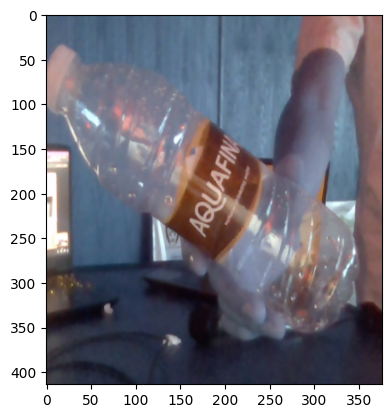

In [4]:
import cv2
import serial
import matplotlib.pyplot as plt
from gtts import gTTS
import IPython.display as ipd
from requests import get
from roboflow import Roboflow

rf = Roboflow(api_key="1bvpLdJ9aEjEyL27fAq0")
project = rf.workspace("ealpr").project("bottle-cleaner")

ser = serial.Serial('/dev/ttyACM0', 9600)

model = project.version(1).model

# dataset = project.version(1).download("yolov7")

img = cv2.imread(f"image_{date_str}.png")
img = cv2.resize(img, (512, 512))

result = model.predict(img, confidence=50, overlap=50).json()

predictions = result["predictions"][0]
output_img = predictions["image_path"]
x, y, w, h = predictions["x"], predictions["y"], predictions["width"], predictions["height"]
x1 = round(x - (w/2))
y1 = round(y - (h/2))
x2 = round(x + (w/2))
y2 = round(y + (h/2))

output_img = img[y1:y2, x1:x2]
plt.imshow(output_img)

scaled_x1 = int((x1 / img.shape[1]) * 255)
scaled_y1 = int((y1 / img.shape[0]) * 255)
scaled_x2 = int((x2 / img.shape[1]) * 255)
scaled_y2 = int((y2 / img.shape[0]) * 255)

command = bytes([scaled_x1, scaled_y1, scaled_x2, scaled_y2])
ser.write(command)
ser.flush()

distance = ser.read()
distance = int.from_bytes(distance, byteorder='big')

print("Distance: {} cm".format(distance))

In [ ]:
30# import cv2
# import serial
# import matplotlib.pyplot as plt
# from gtts import gTTS
# import IPython.display as ipd
# from requests import get  # to make GET request
# from roboflow import Roboflow

# rf = Roboflow(api_key="1bvpLdJ9aEjEyL27fAq0")
# project = rf.workspace("ealpr").project("bottle-cleaner")

# ser = serial.Serial('/dev/ttyACM2', 9600)

# model = project.version(1).model

# img = cv2.imread("/home/mostafatarek/Desktop/000my/zzz/zzz/ac/image_05-06-12-03-05.png")
# img = cv2.resize(img, (512, 512))

# result = model.predict(img, confidence=50, overlap=50).json()

# predictions = result["predictions"][0]
# output_img = predictions["image_path"]
# x, y, w, h = predictions["x"], predictions["y"], predictions["width"], predictions["height"]
# x1 = round(x - (w/2))
# y1 = round(y - (h/2))
# x2 = round(x + (w/2))
# y2 = round(y + (h/2))

# output_img = img[y1:y2, x1:x2]
# plt.imshow(output_img)

# scaled_x1 = int((x1 / img.shape[1]) * 255)
# scaled_y1 = int((y1 / img.shape[0]) * 255)
# scaled_x2 = int((x2 / img.shape[1]) * 255)
# scaled_y2 = int((y2 / img.shape[0]) * 255)

# command = bytes([scaled_x1, scaled_y1, scaled_x2, scaled_y2])
# ser.write(command)
# ser.flush()

# distance = ser.read()
# distance = int.from_bytes(distance, byteorder='big')

# print("Distance: {} cm".format(distance))
